**D3APL: Aplicações em Ciência de Dados** <br/>
IFSP Campinas

Prof. Dr. Samuel Martins (Samuka) <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

# Animal Dataset - v0
We will evaluate some **multiclass classification** CNNs to predict the classes of the **Animals Dataset**: https://www.kaggle.com/datasets/alessiocorrado99/animals10


Target goals:
- Dataset Organization
    + Understand the dataset's structure
    + Handle the _class imbalance_ by _undersampling_
    + Saving the balanced dataset
    + Code a function to load the _animals dataset_ as a _dataframe_

## 1. Dataset
**Animal Dataset**: https://www.kaggle.com/datasets/alessiocorrado99/animals10

Dataset locally stored on _'../datasets/animal_dataset'_

### 1.1 Dataset Info
**Dataset Folder:** `../datasets/animals-dataset/raw-img`

In [1]:
ls ../datasets/animals-dataset/raw-img/

cane/     elefante/  gallina/  mucca/   ragno/
cavallo/  farfalla/  gatto/    pecora/  scoiattolo/


In [6]:
import os

dataset_folder = '../datasets/animals-dataset/raw-img/'

class_folders = sorted(os.listdir(dataset_folder))


print(class_folders)
print(f'Number of class: {len(class_folders)}')

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Number of class: 10


Each **animal** (a **class** in your _classification problem_) has a _folder_ inside the _dataset folder_. <br/>
There are **10 animals (classes)** in the dataset.

Each _class folder_ contain _all_ **images** (**samples**) from the corresponding _class_.

In [14]:
# show me the class proportions: number of samples per class
for class_folder in class_folders:
    full_class_folder = os.path.join(dataset_folder, class_folder)
    
    class_img_filenames = os.listdir(full_class_folder)
    print(f'Number of Images for Class "{class_folder}": {len(class_img_filenames)}')


Number of Images for Class "cane": 4859
Number of Images for Class "cavallo": 2622
Number of Images for Class "elefante": 1444
Number of Images for Class "farfalla": 2111
Number of Images for Class "gallina": 3096
Number of Images for Class "gatto": 1667
Number of Images for Class "mucca": 1864
Number of Images for Class "pecora": 1818
Number of Images for Class "ragno": 4817
Number of Images for Class "scoiattolo": 1862


We see that it is an **imbalanced dataset**. 

The class with the _fewest images_ is _"elefante"_ (class_img_filenames images) and the one with the most images is _"cane"_ (4861 images).

### 1.2 Handling Class Imbalance by Undersampling
To handle the **class imbalance** we will consider the **_undersampling_** technique:

<img src='./figs/undersampling_x_oversampling.jpg' width=600/> <br/>
Source: https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/#:~:text=Undersampling%20is%20a%20technique%20to,information%20from%20originally%20imbalanced%20datasets.

<br/>

Although _the lowest number of samples per class_ in our dataset is _1444 images_, we will consider: **1000 images**.

In [15]:
max_n_samples_per_class = 1000

In [16]:
# ita ==> en
translate = {'cane': 'dog', 'cavallo': 'horse', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'pecora': 'sheep', 'scoiattolo': 'squirrel', 'ragno': 'spider'}

translate

{'cane': 'dog',
 'cavallo': 'horse',
 'elefante': 'elephant',
 'farfalla': 'butterfly',
 'gallina': 'chicken',
 'gatto': 'cat',
 'mucca': 'cow',
 'pecora': 'sheep',
 'scoiattolo': 'squirrel',
 'ragno': 'spider'}

In [38]:
import random

dataset_folder = '../datasets/animals-dataset/raw-img/'
class_folders = sorted(os.listdir(dataset_folder))

# OPTIONAL: just to get the same selected images
random.seed(42)

img_full_paths = []
img_classes = []

for class_folder in class_folders:
    print(f'Class: {class_folder}')  # italiano
    
    # translated class
    img_class = translate[class_folder]  # english
    print(f'Translation: {img_class}')  # italiano
    
    # get the full class folder pathname
    full_class_folder = os.path.join(dataset_folder, class_folder)
    print(full_class_folder)
    
    # get all image filenames (without their parent dir) for the current class/animal
    class_img_filenames = sorted(os.listdir(full_class_folder))
    print(len(class_img_filenames))
    
    #### undersampling from scratch
    ### one possible strategy to select `max_n_samples_per_class` of samples randomly
    # random.shuffle(class_img_filenames)
    # class_img_filenames = class_img_filenames[:max_n_samples_per_class]

    class_img_filenames = random.sample(class_img_filenames, max_n_samples_per_class)
    print(f'Number of images: {len(class_img_filenames)}')
    
    for img_filename in class_img_filenames:
        full_img_path = os.path.join(full_class_folder, img_filename)
        
        img_full_paths.append(full_img_path)
        img_classes.append(img_class)
    
    print()


Class: cane
Translation: dog
../datasets/animals-dataset/raw-img/cane
4859
Number of images: 1000

Class: cavallo
Translation: horse
../datasets/animals-dataset/raw-img/cavallo
2622
Number of images: 1000

Class: elefante
Translation: elephant
../datasets/animals-dataset/raw-img/elefante
1444
Number of images: 1000

Class: farfalla
Translation: butterfly
../datasets/animals-dataset/raw-img/farfalla
2111
Number of images: 1000

Class: gallina
Translation: chicken
../datasets/animals-dataset/raw-img/gallina
3096
Number of images: 1000

Class: gatto
Translation: cat
../datasets/animals-dataset/raw-img/gatto
1667
Number of images: 1000

Class: mucca
Translation: cow
../datasets/animals-dataset/raw-img/mucca
1864
Number of images: 1000

Class: pecora
Translation: sheep
../datasets/animals-dataset/raw-img/pecora
1818
Number of images: 1000

Class: ragno
Translation: spider
../datasets/animals-dataset/raw-img/ragno
4817
Number of images: 1000

Class: scoiattolo
Translation: squirrel
../datase

In [39]:
print(len(img_full_paths))

10000


In [40]:
print(len(img_classes))

10000


In [41]:
# creating a dataframe to store the image full pathnames and their corresponding classes
import pandas as pd

dataset_df = pd.DataFrame({
    'image_pathname': img_full_paths,
    'class': img_classes
})

dataset_df

,image_pathname,class
0,../datasets/animals-dataset/raw-img/cane/OIP-A...,dog
1,../datasets/animals-dataset/raw-img/cane/OIP-1...,dog
2,../datasets/animals-dataset/raw-img/cane/OIP-S...,dog
3,../datasets/animals-dataset/raw-img/cane/OIP-P...,dog
4,../datasets/animals-dataset/raw-img/cane/OIP-N...,dog
...,...,...
9995,../datasets/animals-dataset/raw-img/scoiattolo...,squirrel
9996,../datasets/animals-dataset/raw-img/scoiattolo...,squirrel
9997,../datasets/animals-dataset/raw-img/scoiattolo...,squirrel
9998,../datasets/animals-dataset/raw-img/scoiattolo...,squirrel


In [42]:
dataset_df['class'].value_counts()

class
dog          1000
horse        1000
elephant     1000
butterfly    1000
chicken      1000
cat          1000
cow          1000
sheep        1000
spider       1000
squirrel     1000
Name: count, dtype: int64

##### **Alternative to Undersampling from Scratch**

The [`imbalanced-learn` package](https://imbalanced-learn.org/stable/references/index.html) provides several functionalities to deal with **class_imbalance**, such as _undersampling_ and _oversampling_.

### 1.3 Saving the undersampled dataset
We could create a new folder for the balanced dataset and only save the selected images. <br/>
Instead, let's simply save the dataframe as a csv for simplicity.

In [43]:
dataset_df.to_csv('../datasets/animals-dataset/animals_dataset_balanced.csv', index=False)

##### ATTENTION
The _image pathnames_ shown in the the CSV contain a _relative path_ according to the directory of this notebook. <br/>
If you try to open some image from a notebook started on other location, an error will appear. <br/>
One solution is to save the _absolute path_ of each image or simply _adjust__ the relative path according to your need.

### 1.4 Inspect some images

**Open CV** for Image Processing: https://pypi.org/project/opencv-python/

In [44]:
import cv2

**Read image:** https://www.askpython.com/python-modules/python-imread-opencv#:~:text=Return%20Value%3A%20cv2.,%2C%20unsupported%20or%20invalid%20format

In [46]:
dataset_df.loc[0, 'image_pathname']

'../datasets/animals-dataset/raw-img/cane/OIP-Ag1AiXi5hlmZz6smjLwgwAHaGl.jpeg'

In [47]:
# read an image
img = cv2.imread(dataset_df.loc[0, 'image_pathname'])

In [48]:
print(type(img))

<class 'numpy.ndarray'>


**Image's Shape**
- **Color Image:** (_height_, _width_, _channels_)
- **Channel Order:**  **BGR**: Blue, Green, Red ==> flag value is `cv2.IMREAD_COLOR` in `imread()`.

In [49]:
img.shape

(267, 300, 3)

In [50]:
# channel BLUE
img[:, :, 0]

array([[243, 251, 253, ...,  56,  60,  63],
       [241, 247, 248, ...,  48,  56,  58],
       [242, 245, 243, ...,  35,  42,  47],
       ...,
       [255, 255, 255, ..., 157, 160, 158],
       [255, 255, 255, ..., 169, 166, 157],
       [255, 255, 255, ..., 178, 170, 156]], dtype=uint8)

In [51]:
# channel GREEN
img[:, :, 1]

array([[228, 236, 238, ..., 129, 135, 138],
       [226, 232, 233, ..., 118, 127, 131],
       [227, 230, 228, ...,  98, 106, 113],
       ...,
       [250, 250, 251, ..., 160, 163, 161],
       [250, 251, 252, ..., 172, 167, 158],
       [250, 250, 251, ..., 179, 169, 155]], dtype=uint8)

In [52]:
# channel RED
img[:, :, 2]

array([[209, 217, 219, ..., 211, 214, 217],
       [207, 213, 214, ..., 201, 207, 211],
       [208, 211, 209, ..., 179, 190, 196],
       ...,
       [252, 252, 252, ..., 164, 167, 165],
       [251, 251, 251, ..., 176, 171, 162],
       [252, 252, 251, ..., 183, 173, 159]], dtype=uint8)

**Image depth (number of bits)**:

In [53]:
img.min(), img.max()

(0, 255)

It's an 24-bit color image.

**Visualizing the image**

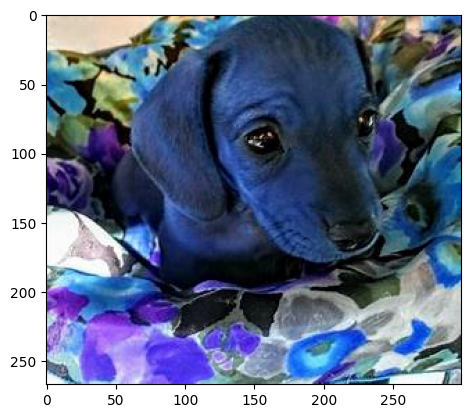

In [54]:
import matplotlib.pyplot as plt

plt.imshow(img)

Note that the **color channels** are in a _different order_. <br/>
We need to _reorganize the channels_ from **BGR** to **RGB**.

In [55]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

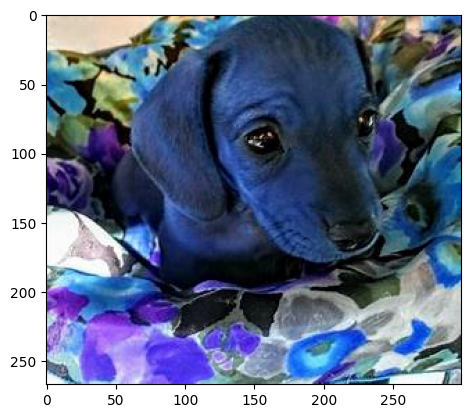

In [56]:
plt.imshow(img)

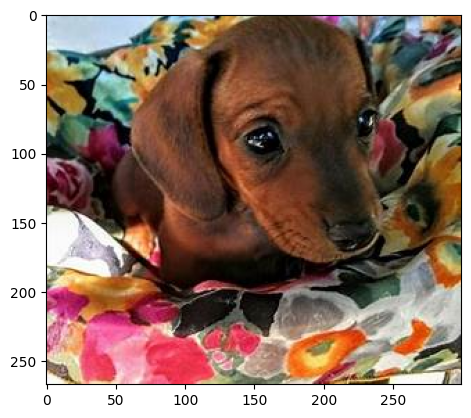

In [58]:
plt.imshow(img_RGB)

(267, 300)


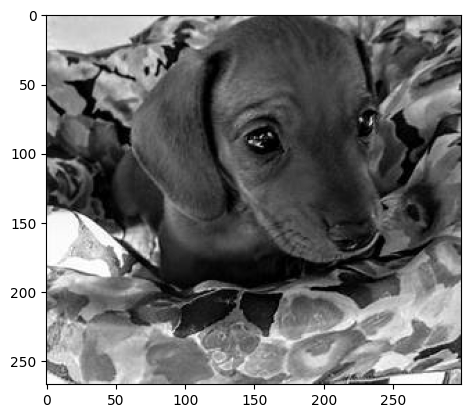

In [64]:
# read the color image as a gray image
gray_img = cv2.imread(dataset_df.loc[0, 'image_pathname'], cv2.IMREAD_GRAYSCALE)

print(gray_img.shape)

plt.imshow(gray_img, cmap='gray')

**Other image:**

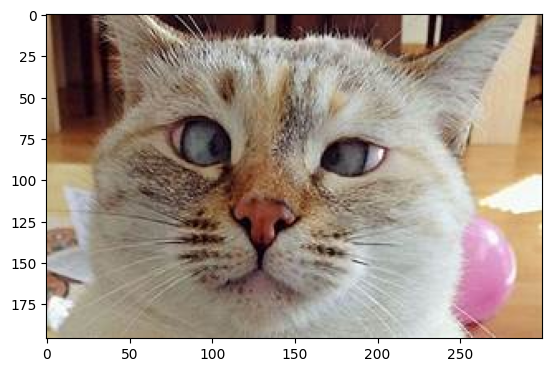

In [65]:
img = cv2.imread(dataset_df.loc[5000, 'image_pathname'])  # BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.imshow(img)

In [66]:
img.shape

(196, 300, 3)

Note that the **images' shapes are different**, so we will need to **rescale the images** to a _standard shape_ according to the _considered network's architecture_.

In [67]:
img.min(), img.max()

(0, 255)

It's an 24-bit color image.

## See more:
- https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory